## Linear classification and the Perceptron algorithm

## The dataset
We will work on the Iris dataset available [here](https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data). The dataset is a single comma-separated value (CSV) file. The first 4 fields of
each line contain the measurements of a sample of Iris flower, the
last field is the name of this sample's species of Iris. More information about
the dataset can be found [here](https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.names).

## The classification task

The goal of this problem is to construct a classifier to distinguish the [Iris setosa](https://en.wikipedia.org/wiki/Iris_setosa) from the other species of Iris. That is, we want to construct a function $f$ which takes as input the vector $x \in\mathbb{R}^4$ of
measurements of a sample and return $f(x) \in \{-1,1\}$ such that:
$$\begin{align*}
    f(x) = \begin{cases}
        1& \text{if the sample is an Iris setosa}\\
        -1& \text{otherwise}
    \end{cases}
\end{align*}$$

In [2]:
# read the dataset
import csv

with open('iris-data.csv', 'r') as iris_data:
    iris_samples = list(csv.reader(iris_data, delimiter=','))

# print the first 3 rows
print(iris_samples[0][:5])

['5.1', '3.5', '1.4', '0.2', 'Iris-setosa']


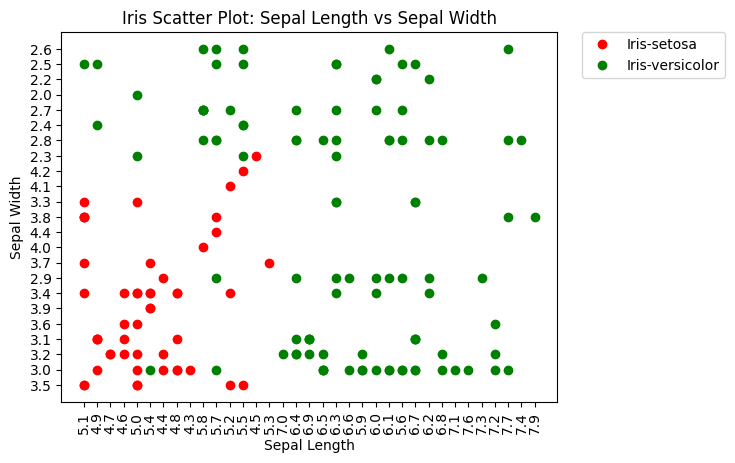

In [3]:
# example scatter plot
import matplotlib.pyplot as plt

# iterate through the rows of iris_samples
for sample in iris_samples:

    x = sample[0]
    y = sample[1]

    label = sample[4]

    if label == 'Iris-setosa':
        plt.plot(x, y, 'ro')
    else:
        plt.plot(x, y, 'go')

# settings
plt.xticks(rotation=90)
plt.title('Iris Scatter Plot: Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend(['Iris-setosa','Iris-versicolor'], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax = plt.gca()
leg = ax.get_legend()
leg.legend_handles[0].set_color('red')
leg.legend_handles[1].set_color('green')

plt.show()

In [4]:
def vLength(x):
    total = 0
    for i in x:
        total = i**2
    return total**(1/2)

def vScalarMult(x, y):
    for i in range(len(x)):
        x[i] = x[i]*y
    return x

def vAddVectors(x, y):
    for i in range(len(x)):
        x[i] = x[i] + y[i]
    return x

def vSubVectors(x, y):
    for i in range(len(x)):
        x[i] = x[i] - y[i]
    return x

def vDot(x, y):
    total = 0
    for i in range(len(x)):
        total = total + x[i]*y[i]
    return total

def error(x, w, y):
    for i in x:
        dot = vDot(w, i)
        if(dot * y <= 0):
            return True
    return False

def perceptron_algo(x, y):
    # weights
    w = [0,0,0,0]
    x = x.copy()
    y = y.copy()
    while error(x,w,1) or error(y,w,-1):
        for i in x:
            dot = vDot(w, i)
            if(dot <= 0):
                w = vAddVectors(w, vScalarMult(i, 1/(vLength(i))))
        for i in y:
            dot = vDot(w, i)
            if(dot >= 0):
                w = vSubVectors(w, vScalarMult(i, 1/(vLength(i))))
    return w

In [5]:
# run the perceptron algorithm on the Iris dataset
x = []
y = []
for i in iris_samples:
    if i[4] == 'Iris-setosa':
        x.append(i[:4])
    else:
        y.append(i[:4])
for i in range(len(x)):
    for j in range(len(x[i])):
        x[i][j] = float(x[i][j])
for i in range(len(y)):
    for j in range(len(y[i])):
        y[i][j] = float(y[i][j])
w = perceptron_algo(x, y)
print(w)

def accuracy(w, x, y):
    correct = 0
    for i in x:
        dot = vDot(w, i)
        if(dot > 0):
            correct = correct + 1
    for i in y:
        dot = vDot(w, i)
        if(dot < 0):
            correct = correct + 1
    return correct/(len(x)+len(y))

print(accuracy(w, x, y))

[1.8564102564102622, 12.161904761904767, -20.006593406593407, -9.0]
1.0
